# Bab Perkenalan

Nama : Praduta Firman

FTDS : Batch-002

Milestone 2 Phase 1

Sumber Dataset : https://www.kaggle.com/dev0914sharma/customer-clustering?select=segmentation+data.csv

Dataset : Segmentasi Pelanggan adalah pembagian pasar menjadi kelompok pelanggan terpisah yang memiliki karakteristik serupa. Segmentasi Pelanggan dapat menjadi sarana yang ampuh untuk mengidentifikasi kebutuhan pelanggan yang tidak terpuaskan. Dengan menggunakan data di atas, perusahaan dapat mengungguli persaingan dengan mengembangkan produk dan layanan yang unik dan menarik.
Anda berutang mal supermarket dan melalui kartu keanggotaan, Anda memiliki beberapa data dasar tentang pelanggan Anda seperti ID Pelanggan, usia, jenis kelamin, pendapatan tahunan dan skor pengeluaran. Anda ingin memahami pelanggan seperti siapa yang menjadi target pelanggan sehingga pengertian dapat diberikan kepada tim pemasaran dan merencanakan strategi yang sesuai. 

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples


# Data Loading

In [2]:
df = pd.read_csv('segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
df.shape

(2000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

# Data Cleaning

In [9]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

# Eksplorasi Data

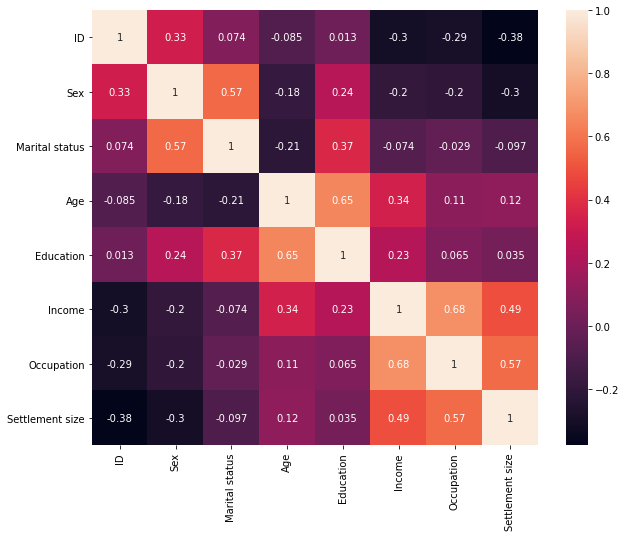

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

In [11]:
num_dat=df[df.describe().columns.values]
cat_dat=df.drop(columns=df.describe().columns.values)

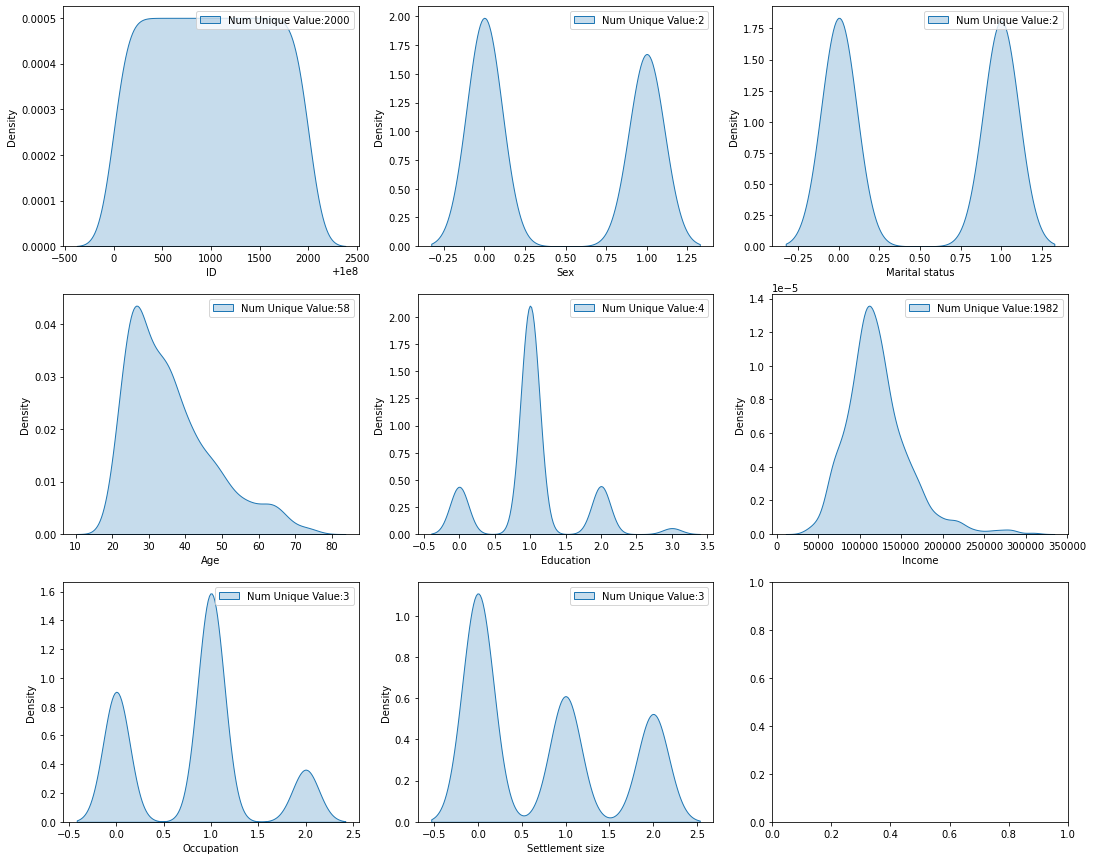

In [12]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(18,15))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0


In [13]:
df.set_index('Settlement size')

,ID,Sex,Marital status,Age,Education,Income,Occupation
Settlement size,,,,,,,
2,100000001,0,0,67,2,124670,1
2,100000002,1,1,22,1,150773,1
0,100000003,0,0,49,1,89210,0
1,100000004,0,0,45,1,171565,1
1,100000005,0,0,53,1,149031,1
...,...,...,...,...,...,...,...
0,100001996,1,0,47,1,123525,0
0,100001997,1,1,27,1,117744,1
0,100001998,0,0,31,0,86400,0


In [14]:
df.groupby('Settlement size').mean()

,ID,Sex,Marital status,Age,Education,Income,Occupation
Settlement size,,,,,,,
0,1.000012e+08,0.601618,0.534884,34.297270,1.009100,101061.787664,0.421638
1,1.000008e+08,0.378676,0.501838,37.579044,1.080882,137430.343750,1.134191
2,1.000007e+08,0.241970,0.408994,37.376874,1.049251,143889.985011,1.256959


EDA Analysis :

- Settlement size (type 0) mempengaruhi gender dan status menikah dengan mean yang lebih tinggi dibandingkan dengan settlement size type lain.

- Sedangkan settlement size (type 1) mempengaruhi usia dan edukasi seseorang pada settlement tersebut lebihh tinggi dari settlement size type lain.

- Kemudian settlement size (type 2) mempengaruhi jumlah nilai income dan pekerjaan seseorang lebih tinggi dibandingkan settlement lain.


# Data Preprocessing

# Feature Engineering

In [15]:
df['Settlement size'].unique()

array([2, 0, 1], dtype=int64)

In [16]:
le =LabelEncoder()

df['Income'] = le.fit_transform(df['Income'])

<AxesSubplot:>

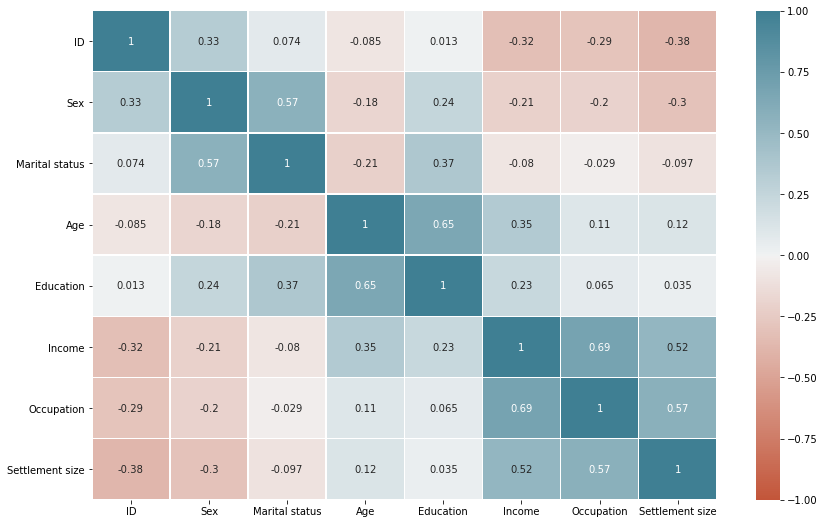

In [17]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

Mereduksi data numerik dengan menggunakan PCA

In [18]:
for col in df.columns:
    print(col, df[col].unique()[0:30], "\n")

ID [100000001 100000002 100000003 100000004 100000005 100000006 100000007
 100000008 100000009 100000010 100000011 100000012 100000013 100000014
 100000015 100000016 100000017 100000018 100000019 100000020 100000021
 100000022 100000023 100000024 100000025 100000026 100000027 100000028
 100000029 100000030] 

Sex [0 1] 

Marital status [0 1] 

Age [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52] 

Education [2 1 0 3] 

Income [1224 1638  347 1814 1618 1571 1699 1890 1645 1829  787 1302  797  352
  617  332 1255 1707 1963 1567 1075 1601  358 1430  636  152  101 1756
 1083 1836] 

Occupation [1 0 2] 

Settlement size [2 0 1] 



In [19]:
categories_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in categories_nan:
    print('{} : {} % missing values'.format(feature, np.round(df[feature].isnull().mean(),4)))

terlihat dari informasi tidak terdapat missing values pada data kategories

In [20]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O' ]

for feature in numerical_nan:
    print('{}: {} % missing values'.format(feature, np.round(df[feature].isnull().mean(),4)))

terlihat dari informasi tidak terdapat missing values pada data numerik

In [21]:
num_dat=df.drop(columns=['Income','Sex','Settlement size'])

In [22]:
scaler=StandardScaler()
num_dat_std=scaler.fit_transform(num_dat)

# Pendefinisian Model dan Pelatihan Model¶

# PCA

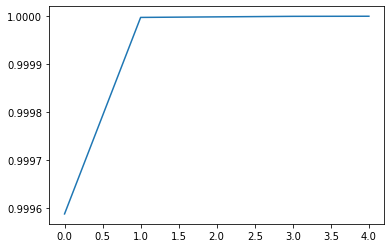

In [23]:
pca=PCA(whiten=True)
pca.fit(num_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [24]:
np.sum(pca.explained_variance_ratio_)

1.0

<AxesSubplot:>

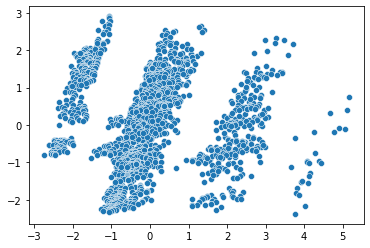

In [25]:
X2D = PCA(n_components=2).fit_transform(num_dat_std)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])

# Unsupervised Model Implementation

# K-Means

1.Elbow Method

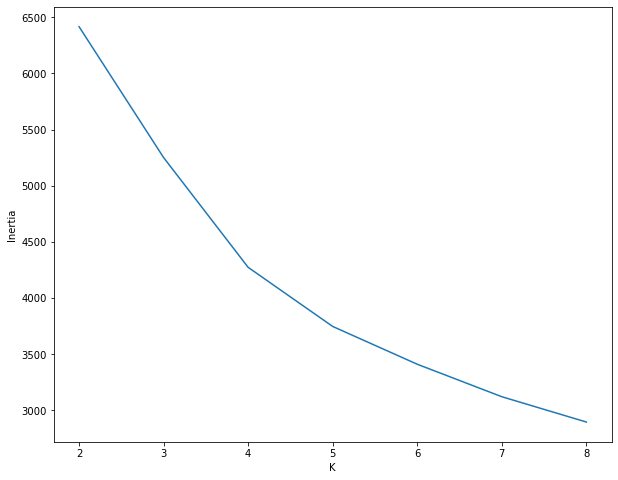

In [26]:
K=[2,3,4,5,6,7,8]
X_reduced=scaler.fit_transform(np.append(X2D,df[['Income','Sex','Settlement size']],axis=1))

inertia=[KMeans(n_clusters=i).fit(X_reduced).inertia_ for i in K]
plt.subplots(figsize=(10,8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show();

Terlihat terdapat sedikit lekukan di angka 4 dan 5. Maka angka tersebut yang akan menjadi acuan digunakan KMeans untuk mengcluster. Tapi kita harus melihat silhouette plot terlebih dulu.

2.Silhouette Plot

Text(0, 0.5, 'Silhouettte Score')

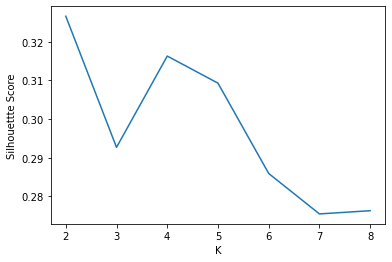

In [27]:
K=[2,3,4,5,6,7,8]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_for i in K]
s_score=[silhouette_score(X_reduced, KMeans(n_clusters=i).fit(X_reduced).labels_)for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouettte Score')

In [28]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.32655229298828564
For n_clusters = 3 The average silhouette_score is : 0.292691283273186
For n_clusters = 4 The average silhouette_score is : 0.31616965567297733
For n_clusters = 5 The average silhouette_score is : 0.3091830800599031
For n_clusters = 6 The average silhouette_score is : 0.285950389275819
For n_clusters = 7 The average silhouette_score is : 0.3015740866035562
For n_clusters = 8 The average silhouette_score is : 0.29611133256655225


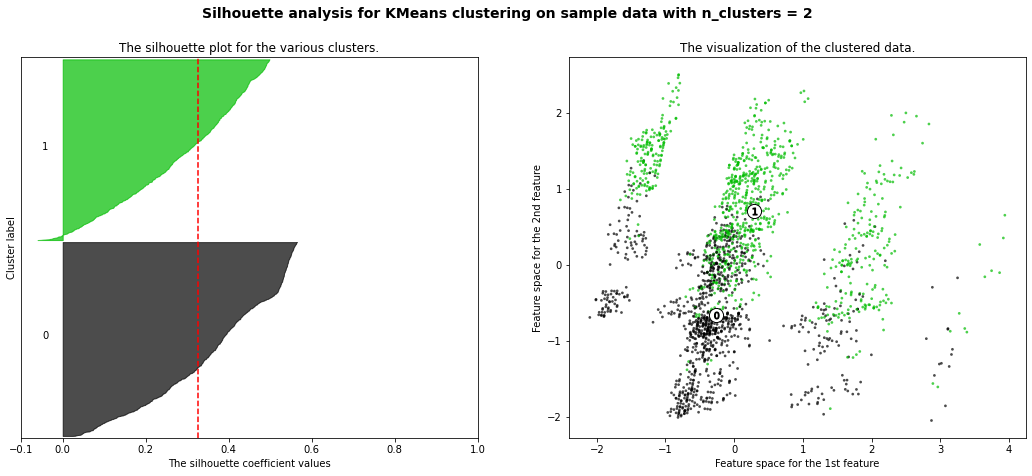

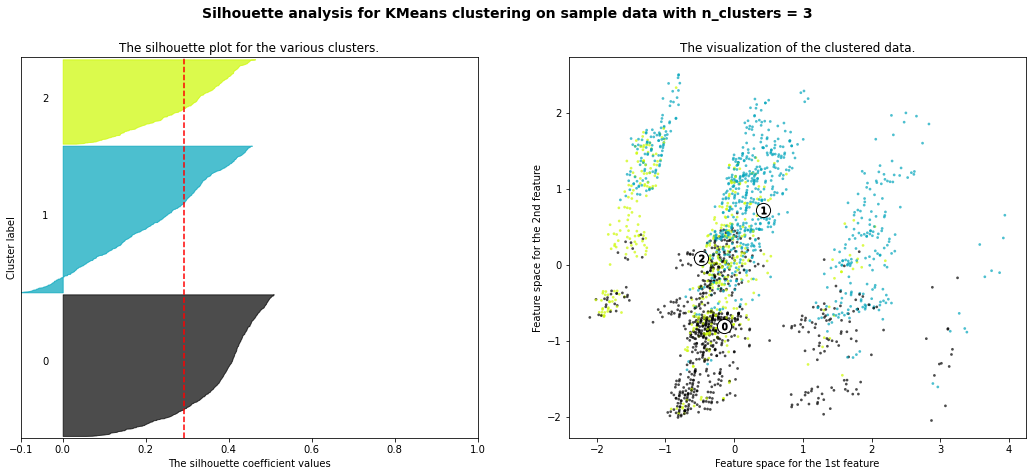

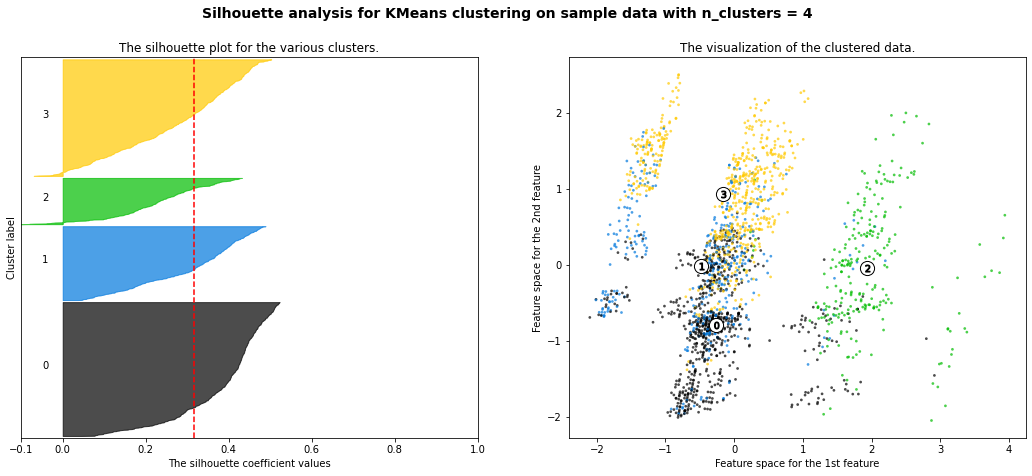

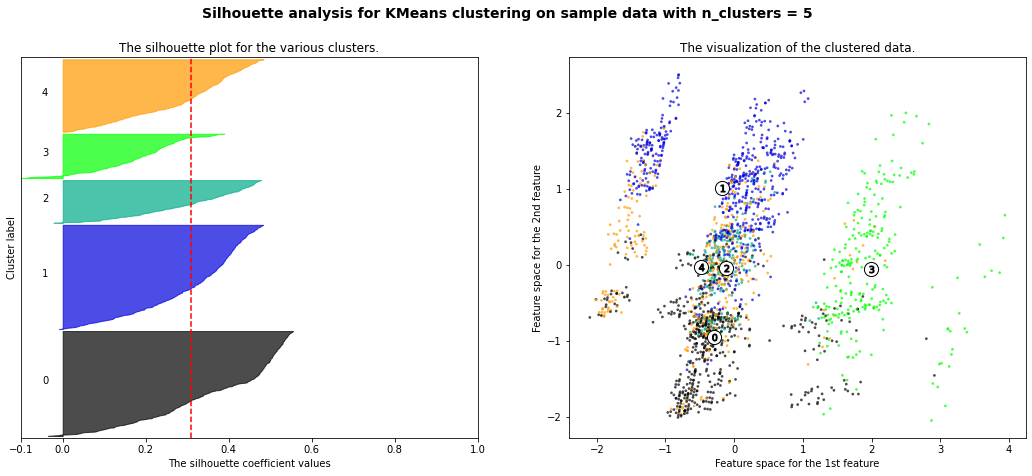

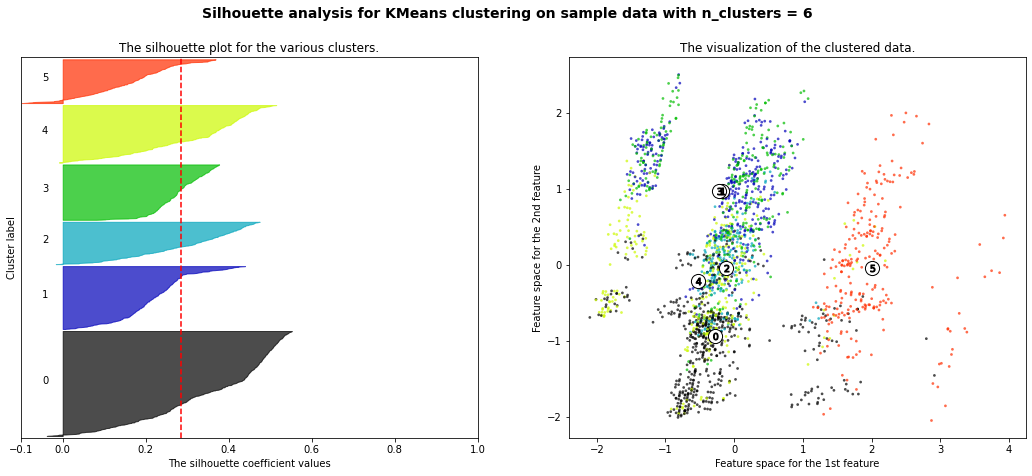

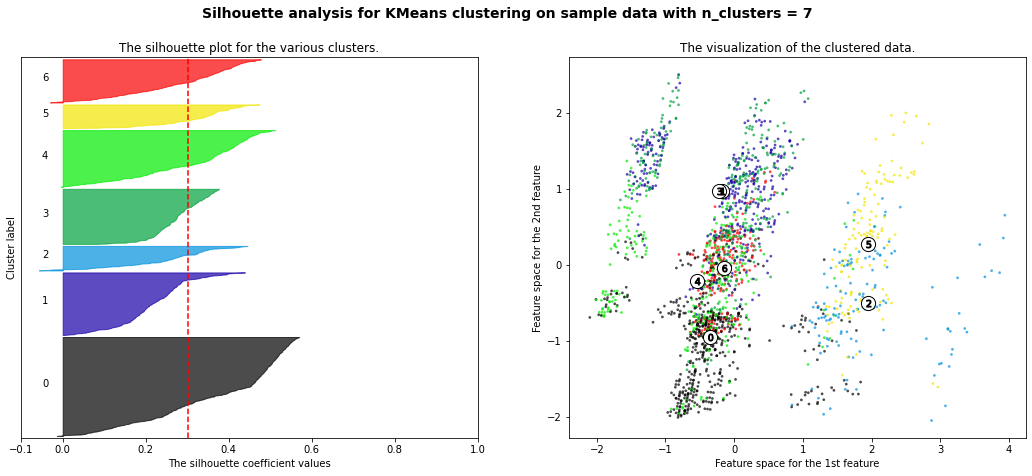

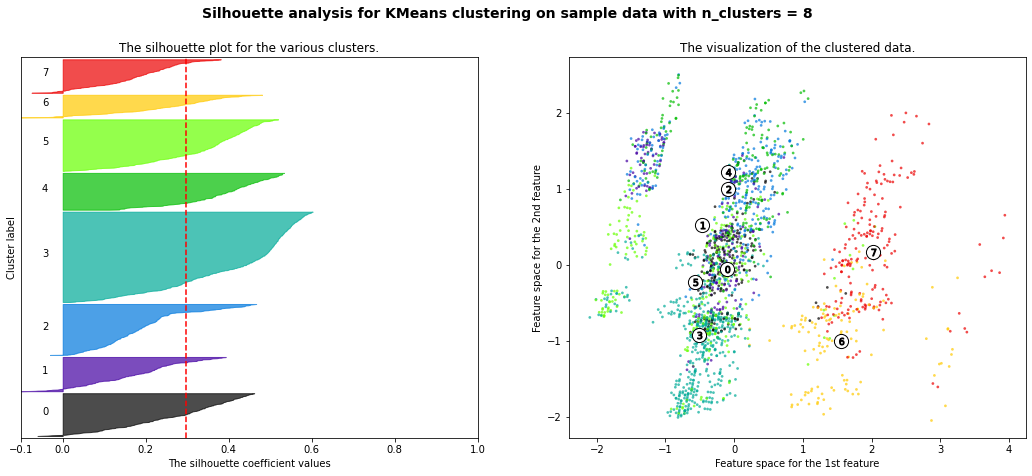

In [29]:
plot_silhouette(K,X_reduced)

Berdasarkan silhouette score terdapat angka 2 dan angka 4 yang beda tipis untuk angka tertinggi dari silhouette score tersebut. Namun Angka 2 ini merupakan angka tertinggi dari silhouette score. Jadi angka 2 ini yang djadikan untuk pengclusteran.

In [30]:
scaler=StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Sex','Income']))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

# Evaluasi Model

In [31]:
df['Cluster'] = kmeans.labels_

In [32]:
df.set_index('Cluster')

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,,
1,100000001,0,0,67,2,1224,1,2
1,100000002,1,1,22,1,1638,1,2
0,100000003,0,0,49,1,347,0,0
1,100000004,0,0,45,1,1814,1,1
1,100000005,0,0,53,1,1618,1,1
...,...,...,...,...,...,...,...,...
0,100001996,1,0,47,1,1191,0,0
0,100001997,1,1,27,1,1048,1,0
0,100001998,0,0,31,0,305,0,0


In [33]:
df.Cluster.unique()

array([1, 0])

In [34]:
df.groupby('Cluster').mean()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,,
0,1.000013e+08,0.642582,0.585742,33.044316,0.987476,666.514451,0.411368,0.119461
1,1.000007e+08,0.256757,0.400208,39.000000,1.092516,1343.401247,1.241164,1.407484


Dihitung mean/rata-ratanya

# Model Inference

In [35]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,1224,1,2,1
1,100000002,1,1,22,1,1638,1,2,1
2,100000003,0,0,49,1,347,0,0,0
3,100000004,0,0,45,1,1814,1,1,1
4,100000005,0,0,53,1,1618,1,1,1


In [36]:
values1 = [100000001, 0, 67, 2, 1, 2]

In [37]:
values2 = [100000003, 0, 49, 1, 0, 0]

In [38]:
values = [values1, values2]

In [39]:
data_dummies = pd.DataFrame(values, columns=['ID','Marital status','Age','Education','Occupation','Settlement size'])

In [40]:
data_dummies

,ID,Marital status,Age,Education,Occupation,Settlement size
0,100000001,0,67,2,1,2
1,100000003,0,49,1,0,0


In [41]:
prediction = kmeans.predict(data_dummies)

In [42]:
prediction

array([0, 0])

Dari analisa model inference dapat disimpulkan bahwa pelanggan pada data pertama termasuk dalam cluster 0 dan pelanggan pada data ke 2 masuk ke dalam cluster 0 juga.

# Differensial Cluster 0 dan Cluster 1

- Jadi rata - rata segmentasi data yang mempengaruhi pembagian pasar dengan nilai tertinggi terdapat pada cluster 0, jika dibandingkan dengan cluster 1.

- Lalu rata - rata yang mempengaruhi cluster 0 dengan angka tertinggi adalah pada segmentasi : Status Menikah, Pendapatan tahunan, Pekerjaan, dan ukuran tempat tinggal.

- Sedangkan rata - rata yang mempengaruhi cluster 1 dengan angka tertinggi adalah pada segmentasi :Jenis kelamin, Usia, dan Pendidikan.

# Overall Analysis

- Data Id customer tidak berpengaruh dikarenakan hanya menunjukkan kepemilikan pelanggan sebagai tanda pengenal saja.
- Saat pengclusteran data, data yang digunakan untuk PCA yaitu : Settlement Size, Sex, dan Income

- Setelah pengclusteran data, data dimasukkan dan dievaluasi oleh KMeans.

- Maka didapatkan nilai inertia di angka dan silhouette score di angka 2. Namun, saya memutuskan untuk memilih di angka 2 dikarenakan kita harus mengutamakan terlebih dulu silhouette score dengan nilai tertinggi, sehingga saya memilih angka 2.

# Model Saving

In [43]:
pickle.dump(kmeans, open('model_clustering.pkl','wb'))